In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager

In [2]:
df = pd.read_csv('A_stat_data_112.csv')
df2 = df.copy()

In [3]:
df2.head()

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072


In [4]:
df_DiffAndPass = df2[['first_correct_rate', 'mission_difficulty']].dropna()
df_DiffAndPass.head()
df_DiffAndPass.to_csv("DiffAndPass.csv", index=False)

In [5]:
df_DiffAndPass.head()

,first_correct_rate,mission_difficulty
10,0.0,易
11,0.4,中
40,0.2,難
64,0.2,難
65,0.4,難


In [ ]:
# 定義一個函數來轉換難度等級
def translate_difficulty(difficulty):
    if difficulty == "易":
        return "Easy"
    elif difficulty == "中":
        return "Medium"
    elif difficulty == "難":
        return "Hard"
    else:
        return difficulty  # 如果遇到未知的值，保持原樣

# 使用 apply 函數應用到 mission_difficulty 欄位
df_DiffAndPass["mission_difficulty"] = df_DiffAndPass["mission_difficulty"].apply(translate_difficulty)

# 查看結果
df_DiffAndPass.head()


,first_correct_rate,mission_difficulty
10,0.0,Easy
11,0.4,Medium
40,0.2,Hard
64,0.2,Hard
65,0.4,Hard


## 困難題圖形

In [13]:
df_hard = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Hard", na=False)]
df_hard.tail()
LensOfHard = len(df_hard)

In [14]:
import plotly.express as px
import plotly.graph_objects as go

# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_hard['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_hard['first_correct_rate'].mean()
mean_rate_hard = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (Hard)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()


## 中等題圖形

In [15]:
df_mid = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Medium", na=False)]
df_mid.tail()
LensOfMid = len(df_mid)

In [16]:
import plotly.express as px
import plotly.graph_objects as go

# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_mid['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_mid['first_correct_rate'].mean()
mean_rate_mid = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (Medium)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()


## 簡易題圖形

In [17]:
df_easy = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Easy", na=False)]
df_easy.tail()
LensOfEasy = len(df_easy)

In [18]:
import plotly.express as px
import plotly.graph_objects as go

# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_easy['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_easy['first_correct_rate'].mean()
mean_rate_ez = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (Easy)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()


In [19]:
print(mean_rate_ez)
print(mean_rate_mid)
print(mean_rate_hard)
#print(LensOfEasy,LensOfMid,LensOfHard)

0.47508006578377904
0.4534720475411898
0.43858718797653556


# ANOVA分析

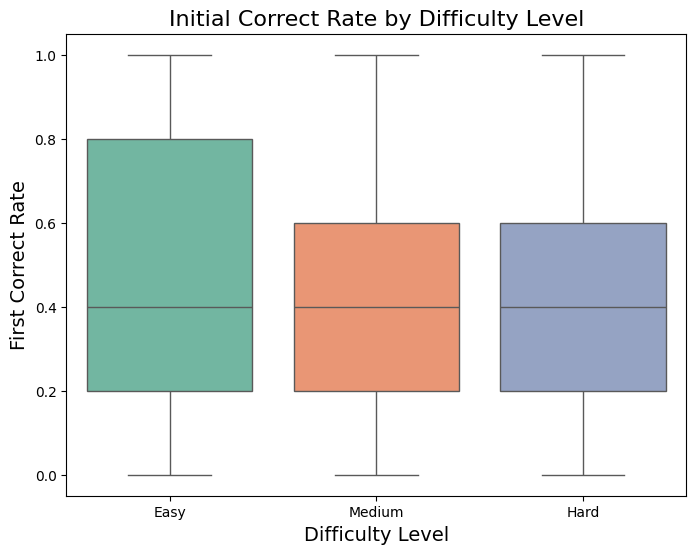

ANOVA p-value: 1.2003713636168536e-148


In [25]:
# 資料
data = df_DiffAndPass

# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")

# 中等與簡單題目之ANOVA

In [38]:
df_EasyAndMid = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Medium") |
    (df_DiffAndPass["mission_difficulty"] == "Easy")
]

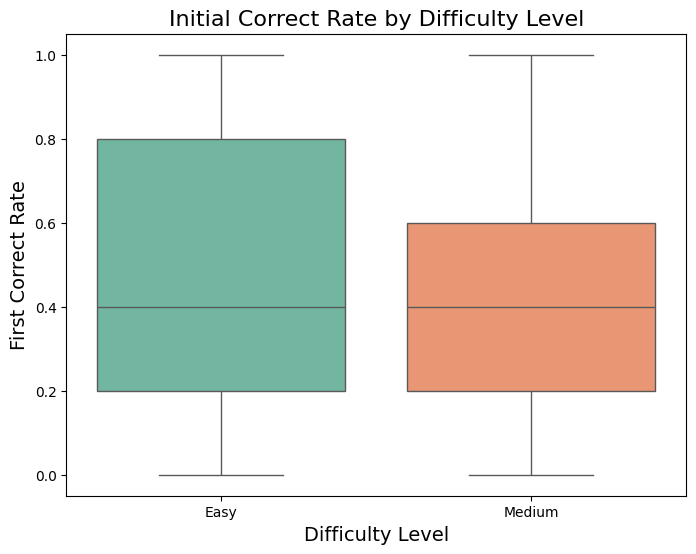

ANOVA p-value: 3.2033224681677758e-86


In [42]:
# 資料
data = df_EasyAndMid
# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")

# 中等與困難題目之ANOVA

In [ ]:
df_MidAndHard = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Medium") |
    (df_DiffAndPass["mission_difficulty"] == "Hard")
]

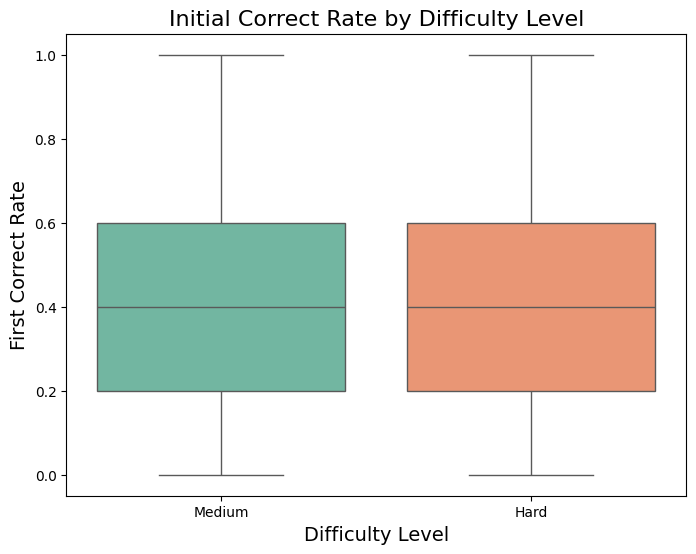

ANOVA p-value: 8.284437395450216e-29


In [29]:
# 資料
data = df_MidAndHard

# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")

# 簡單與困難題目之ANOVA分析

In [43]:
df_EasyAndHard = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Easy") |
    (df_DiffAndPass["mission_difficulty"] == "Hard")
]

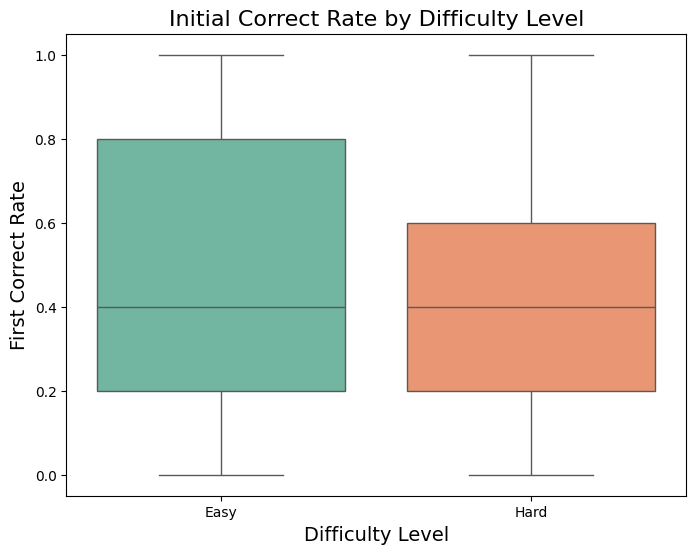

ANOVA p-value: 6.359809504261657e-133


In [45]:
# 資料
data = df_EasyAndHard

# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")

# 解釋
### Y軸為答對率，介於0(全錯)到1(全對)之間，X軸為難度分組，箱形圖可以看出，簡單的題目的答對率上限明顯偏高，單獨拉出中等及困難題目後，可以看出他們的P-Value仍小於信心水準
#### ANOVA 之P-Value小於信心水準顯著性水準 (𝛼) 為 0.05，因此我們拒絕零假設，每個問題的難度差距以及答對率的關聯是顯著的，即該題目設計之難度正確無誤。